## **Importing the libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.express as px
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df = df.drop('User ID', axis=1)
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


## **Data Wrangling**

In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [5]:
df.shape

(400, 4)

In [6]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.nunique()

Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [9]:
df.value_counts()

Gender  Age  EstimatedSalary  Purchased
Female  41   72000            0            3
Male    40   57000            0            3
        42   65000            0            2
             54000            0            2
        35   75000            0            2
                                          ..
Female  42   90000            1            1
             80000            1            1
             79000            0            1
             75000            0            1
Male    60   102000           1            1
Length: 380, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


## **EDA**

In [11]:
corr = df.corr(method='pearson')

<AxesSubplot:>

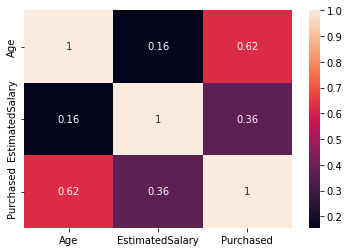

In [12]:
sns.heatmap(corr, annot=True)

In [15]:
px.area(df, x='Age', y='EstimatedSalary')

In [19]:
px.bar(df.head(30), x='Gender', y='Purchased', color='Age')

In [23]:
px.box(df, x='Purchased', y='EstimatedSalary', color='Gender')

## **Machine Learning Part**

In [11]:
std = StandardScaler()

In [12]:
lb = LabelEncoder()

In [13]:
df['Gender']= lb.fit_transform(df['Gender'])
df

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [17]:
df[['Age','EstimatedSalary']]=std.fit_transform(df[['Age','EstimatedSalary']])

In [19]:
df

,Gender,Age,EstimatedSalary,Purchased
0,1,-1.781797,-1.490046,0
1,1,-0.253587,-1.460681,0
2,0,-1.113206,-0.785290,0
3,0,-1.017692,-0.374182,0
4,1,-1.781797,0.183751,0
...,...,...,...,...
395,0,0.797057,-0.844019,1
396,1,1.274623,-1.372587,1
397,0,1.179110,-1.460681,1
398,1,-0.158074,-1.078938,0


In [20]:
x= df.iloc[:,0:3]
x

,Gender,Age,EstimatedSalary
0,1,-1.781797,-1.490046
1,1,-0.253587,-1.460681
2,0,-1.113206,-0.785290
3,0,-1.017692,-0.374182
4,1,-1.781797,0.183751
...,...,...,...
395,0,0.797057,-0.844019
396,1,1.274623,-1.372587
397,0,1.179110,-1.460681
398,1,-0.158074,-1.078938


In [21]:
y = df.iloc[:,3:]
y

,Purchased
0,0
1,0
2,0
3,0
4,0
...,...
395,1
396,1
397,1
398,0


In [22]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(x_train,y_train)

c:\Users\Ali Hasnain\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [25]:
model.score(x_train,y_train)

0.85

In [26]:
model.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [27]:
model.score(x_test, y_test)

0.8083333333333333

In [28]:
err = mean_squared_error(y_test, model.predict(x_test))
err 

0.19166666666666668